Offseting a spline
==================

By: Bryce DeAlessio

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
x = np.linspace(0, 2*np.pi, 33)
y = np.sin(x)

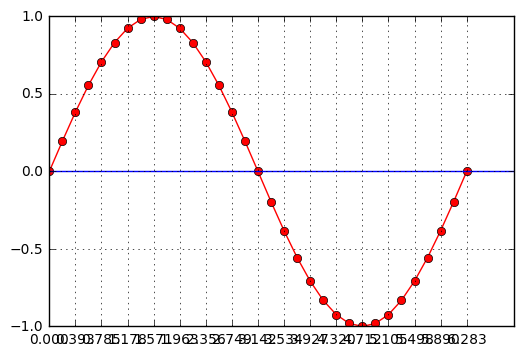

In [3]:
ax = plt.plot(x,y, 'ro-')
ax = plt.gca()
ax.axhline()
ax.grid()
x_ticks = ax.set_xticks(np.linspace(0,2*np.pi,17))
plt.show()

In [4]:
bspline = UnivariateSpline(x,y)
slopes = bspline.derivative()(x)
normals = -1/slopes

In [44]:
#y = mx+b
offset = 0.50
uniform = ( normals /np.abs(normals) )
print(uniform_normals)
xo = (uniform*offset) / np.sqrt((1.0 + normals**2)) + x
yo = (uniform*offset) * (normals / np.sqrt(1.0 + normals**2)) + y

[-0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3]


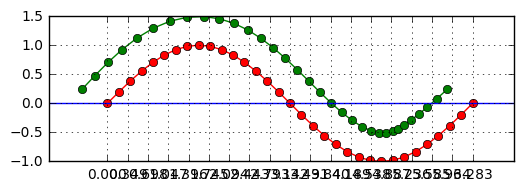

In [53]:
plt.plot(xo,yo, 'go-')
plt.plot(x,y, 'ro-')
ax = plt.gca()
ax.set_aspect('equal')
ax.axhline()
ax.grid()
x_ticks = ax.set_xticks(np.linspace(0,2*np.pi,19))
